In [1]:
# from datetime import datetime, timedelta
# from opendrift.models.oceandrift import OceanDrift

# # Basic ocean drift module: current + 2% of wind
# o = OceanDrift(loglevel=20)

# # Adding readers for global Thredds datasets:
# # - Ocean forecast from global HYCOM model
# # - Weather forecast from NOAA/NCEP
# o.add_readers_from_list([
#     '/import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2024.02.29/netcdfOutput/hc_his_00062.nc'
#     'https://tds.hycom.org/thredds/dodsC/GLBy0.08/latest',
#     'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/ncep_global/NCEP_Global_Atmospheric_Model_best.ncd'])

# o.seed_elements(lat=24, lon=-81, time=datetime.utcnow(),
#                 number=5000, radius=10000)

# o.run(time_step=timedelta(minutes=30),
#       duration=timedelta(days=5))
# o.animation()

In [2]:
from datetime import datetime, timedelta
from opendrift.models.oceandrift import OceanDrift
from opendrift.readers import reader_ROMS_native
import xarray as xr
import numpy as np

#from opendrift.readers.reader_ROMS_native import Reader
        # ds = xr.open_dataset(filename, decode_times=False)
        # r = Reader(ds)

o2=[]
# Basic ocean drift module: current + 2% of wind
o2 = OceanDrift(loglevel=20)

13:11:11 INFO    opendrift.models.basemodel:528: OpenDriftSimulation initialised (version 1.11.1 / v1.11.1-26-gc27e2f6-dirty)


In [3]:


#o2.set_config('general:coastline_action', 'none')
#o2.set_config('general:use_auto_landmask', False)
# Adding readers for global Thredds datasets:
# - Ocean forecast from global HYCOM model
# - Weather forecast from NOAA/NCEP

netCDFs = '/import/VERTMIX/DABOB_JGP/HC_100m_30layers/Experiments/HC_100m_2024.04.09/netcdfOutput/hc_his_*.nc'
grid = '/import/VERTMIX/DABOB_JGP/HC_100m_30layers/Experiments/HC_100m_2024.04.09/HC_100mME_wetDry.nc'
#grid = './test_grid_lonshift.nc'

#hc_grid_ds = xr.open_dataset('/import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2024.02.29/HC_100mME_wetDry.nc')
hc_ds = xr.open_mfdataset(netCDFs)
hc_grid_ds = xr.open_dataset(grid)

hc_native = reader_ROMS_native.Reader(f'{netCDFs}',gridfile=grid)

o2.add_reader(hc_native,)



13:11:40 INFO    opendrift.readers.reader_ROMS_native:148: Opening dataset: /import/VERTMIX/DABOB_JGP/HC_100m_30layers/Experiments/HC_100m_2024.04.09/netcdfOutput/hc_his_*.nc
13:11:40 INFO    opendrift.readers.reader_ROMS_native:150: Opening files with MFDataset
13:11:41 INFO    opendrift.readers.reader_ROMS_native:246: Read GLS parameters from file.
13:11:41 WARNING opendrift.readers.basereader.structured:50: No proj string or projection could be derived, using 'fakeproj'. This assumes that the variables are structured and gridded approximately equidistantly on the surface (i.e. in meters). This must be guaranteed by the user. You can get rid of this warning by supplying a valid projection to the reader.
13:11:41 INFO    opendrift.readers.basereader.structured:90: Making interpolator for lon,lat to x,y conversion...


In [4]:
hc_native

Reader: roms native
Projection: 
  None
Coverage: [pixels]
  xmin: 0.000000   xmax: 470.000000   step: 1   numx: 471
  ymin: 0.000000   ymax: 661.000000   step: 1   numy: 662
  Corners (lon, lat):
    (236.82,  47.89)  (237.44,  47.89)
    (236.82,  47.29)  (237.44,  47.29)
Vertical levels [sigma]: 
  [-0.98333333 -0.95       -0.91666667 -0.88333333 -0.85       -0.81666667
 -0.78333333 -0.75       -0.71666667 -0.68333333 -0.65       -0.61666667
 -0.58333333 -0.55       -0.51666667 -0.48333333 -0.45       -0.41666667
 -0.38333333 -0.35       -0.31666667 -0.28333333 -0.25       -0.21666667
 -0.18333333 -0.15       -0.11666667 -0.08333333 -0.05       -0.01666667]
Available time range:
  start: 2024-04-09 00:00:00   end: 2024-04-13 23:00:00   step: 1:00:00
    120 times (0 missing)
Variables:
  ocean_s_coordinate_g2
  sea_surface_height
  x_sea_water_velocity
  y_sea_water_velocity
  upward_sea_water_velocity
  sea_water_temperature
  sea_water_salinity
  turbulent_kinetic_energy
  turbule

In [5]:
# import numpy as np
# plt.pcolor(hc_native.Dataset['temp'][10,29,:,:])

In [6]:
# plt.pcolor(hc_native.Dataset.v[10,29,:,:])

13:11:54 INFO    opendrift.models.basemodel.environment:220: Adding a dynamical landmask with max. priority based on assumed maximum speed of 1.0 m/s. Adding a customised landmask may be faster...
13:11:58 INFO    opendrift.models.basemodel.environment:247: Fallback values will be used for the following variables which have no readers: 
13:11:58 INFO    opendrift.models.basemodel.environment:250: 	x_wind: 0.000000
13:11:58 INFO    opendrift.models.basemodel.environment:250: 	y_wind: 0.000000
13:11:58 INFO    opendrift.models.basemodel.environment:250: 	ocean_vertical_diffusivity: 0.000000
13:11:58 INFO    opendrift.models.basemodel.environment:250: 	sea_surface_wave_significant_height: 0.000000
13:11:58 INFO    opendrift.models.basemodel.environment:250: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
13:11:58 INFO    opendrift.models.basemodel.environment:250: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
13:11:58 INFO    opendrift.models.basemodel.environment:250: 	sea_surf

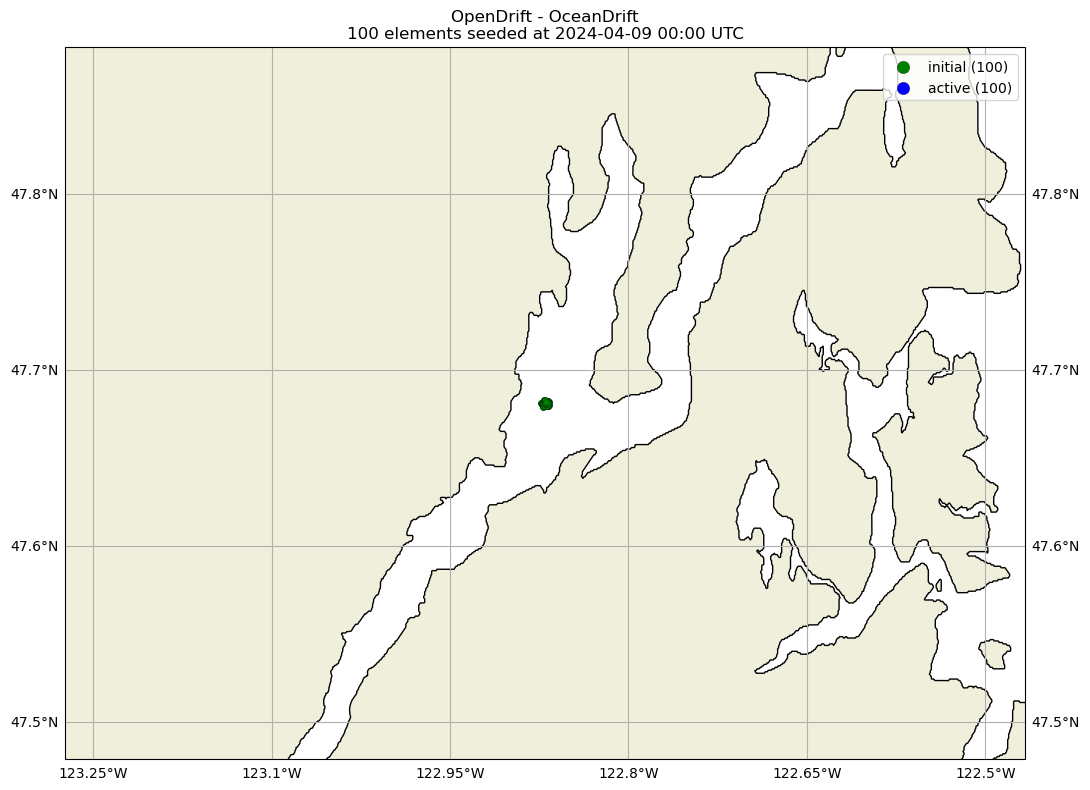

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n100 elements seeded at 2024-04-09 00:00 UTC'}>,
 <Figure size 1100x818.81 with 1 Axes>)

In [7]:
hc_sill = (47.75,237.26)
#hc_sill = (47.75,-122.74)
dabob_mouth = (47.69555,237.141)

dabob_sill_gap = (47.681, -122.87 + 360)
#dabob_sill_gap = (47.681, -122.87)


# o2.seed_elements(lon=hc_sill[1], 
#                 lat=hc_sill[0], 
#                 time=datetime(2024,3,2,0,0,),
#                 number=50, 
#                 radius=100)
o2.seed_elements(lon=dabob_sill_gap[1], 
                lat=dabob_sill_gap[0], 
                time=datetime(2024,4,9,0,0,),
                number=100, 
                radius=100,
                z=np.linspace(-95,-100,100)
                )
o2.plot()


In [8]:
o2.report_missing_variables

<bound method OpenDriftSimulation.report_missing_variables of ===========================
Model:	OceanDrift     (OpenDrift version 1.11.1)
	0 active Lagrangian3DArray particles  (0 deactivated, 100 scheduled)
-------------------
Environment variables:
  -----
  sea_floor_depth_below_sea_level
  turbulent_generic_length_scale
  turbulent_kinetic_energy
  upward_sea_water_velocity
  x_sea_water_velocity
  y_sea_water_velocity
     1) roms native
  -----
  land_binary_mask
     1) global_landmask
  -----
Readers not added for the following variables:
  ocean_mixed_layer_thickness
  ocean_vertical_diffusivity
  sea_surface_swell_wave_peak_period_from_variance_spectral_density
  sea_surface_swell_wave_significant_height
  sea_surface_swell_wave_to_direction
  sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment
  sea_surface_wave_period_at_variance_spectral_density_maximum
  sea_surface_wave_significant_height
  sea_surface_wave_stokes_drift_x_velocity
  sea_s

In [9]:
o2.run(time_step=timedelta(minutes=10),
      duration=timedelta(hours=48),
      outfile='test_output_95_100.nc');
#o2.plot()

13:13:13 INFO    opendrift.models.basemodel:891: Using existing reader for land_binary_mask
13:13:13 INFO    opendrift.models.basemodel:903: All points are in ocean
13:13:13 INFO    opendrift.readers.reader_ROMS_native:318: Using mask_rho for mask_rho
13:13:13 INFO    opendrift.models.basemodel:1992: 2024-04-09 00:00:00 - step 1 of 288 - 100 active elements (0 deactivated)
13:13:14 INFO    opendrift.readers.reader_ROMS_native:339: Using mask_u for mask_u
13:13:15 INFO    opendrift.readers.reader_ROMS_native:535: Time: 0:00:01.181222
13:13:15 INFO    opendrift.readers.reader_ROMS_native:360: Using mask_v for mask_v
13:13:16 INFO    opendrift.models.basemodel:1992: 2024-04-09 00:10:00 - step 2 of 288 - 100 active elements (0 deactivated)
13:13:16 INFO    opendrift.models.basemodel:1992: 2024-04-09 00:20:00 - step 3 of 288 - 100 active elements (0 deactivated)
13:13:16 INFO    opendrift.models.basemodel:1992: 2024-04-09 00:30:00 - step 4 of 288 - 100 active elements (0 deactivated)
13:13:

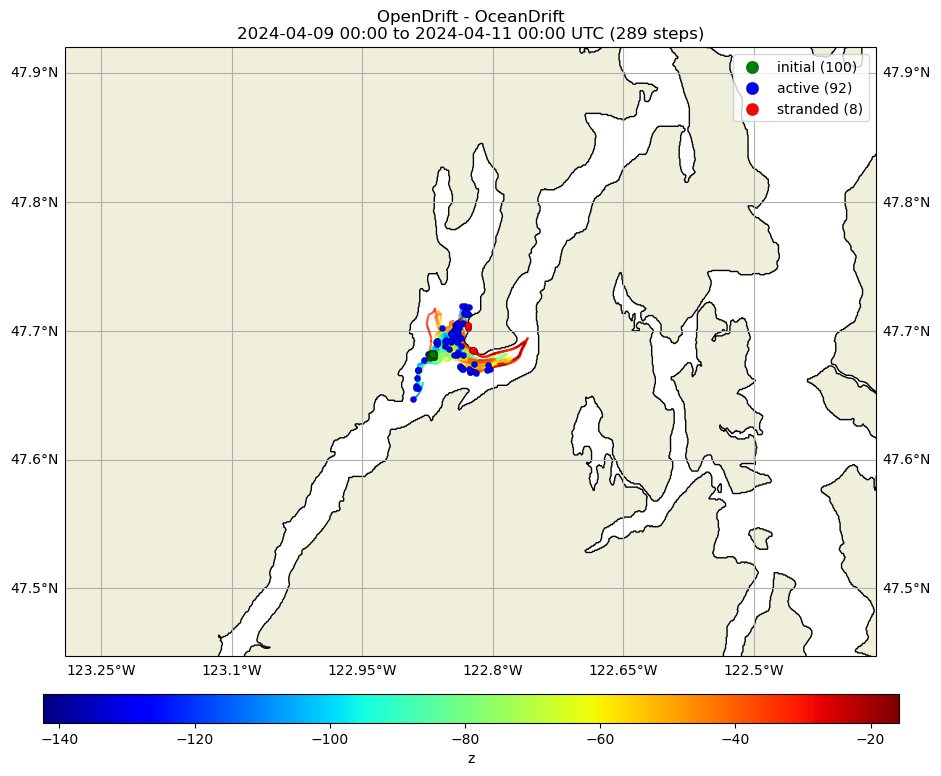

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2024-04-09 00:00 to 2024-04-11 00:00 UTC (289 steps)'}>,
 <Figure size 1100x828.778 with 2 Axes>)

In [10]:
o2.plot(linecolor='z',alpha=0.3)

In [11]:
test_out = xr.open_dataset('test_output_95_100.nc')
!ls '../../pisces-dabob-vis/data/'

external  interim  processed  raw


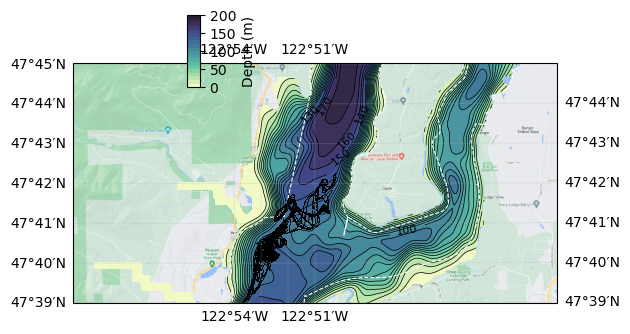

In [333]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
import matplotlib.ticker as mticker
import pandas as pd
import cmocean

fig=[]
ax=[]

# Create a Stamen terrain background instance.
stamen_terrain = cimgt.GoogleTiles()
#stamen_terrain = cimgt

fig = plt.figure()#figsize=(8,10))

# Create a GeoAxes in the tile's projection.
#ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax = fig.add_subplot(1, 1, 1, projection=ccrs.UTM(10))


hc_masked = hc_grid_ds['h'] / hc_grid_ds['mask_rho']

permit_boundary = pd.read_csv('../../pisces-dabob-vis/data/raw/PISCES-permit-area.csv')

(ll_lat, ll_lon) = ( 47.65, 237.0-360)
(ur_lat, ur_lon) = ( 47.75, 237.30-360)

# (ll_lat, ll_lon) = ( 47.55, -122.925)
# (ur_lat, ur_lon) = ( 47.75, -122.8)

# (ll_lat, ll_lon) = ( 47.67, -122.9)
# (ur_lat, ur_lon) = ( 47.69, -122.85)

# Add the Stamen data at zoom level 15.
ax.add_image(stamen_terrain, 13)
#plt.pcolor(hc_grid_ds['lon_rho']-360,hc_grid_ds['lat_rho'],hc_masked,cmap='Blues',norm=norm,alpha=0.8,transform=ccrs.PlateCarree())
CS = plt.contour(hc_grid_ds['lon_rho']-360,
            hc_grid_ds['lat_rho'],
            hc_masked,
            levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],
            linewidths=0.5, colors='k',
            alpha=1.0, 
            transform=ccrs.PlateCarree())
plt.clabel(CS,
           levels=[100,110,120,130,140,150,160,170,180,190,200],
           fontsize=8,inline=True,inline_spacing=-2)
           # inline=True,
           # ,)
plt.contourf(hc_grid_ds['lon_rho']-360,
            hc_grid_ds['lat_rho'],
            hc_masked,
            levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],
            cmap=cmocean.cm.deep,
            alpha=1.0, 
            transform=ccrs.PlateCarree())

cbaxes = fig.add_axes([0.3, 0.7, 0.02, 0.15]) 
cb=plt.colorbar(cax=cbaxes, 
                orientation='vertical',
                ticks = [0,50,100,150,200],
                format = mticker.FixedFormatter(['0','50','100','150','200']),
                extend='both', 
                label='Depth (m)'
               )
cbaxes.set_zorder(5)


# plot permit area
ax.plot(-permit_boundary['Longitude'],permit_boundary['Latitude'], color='white',linestyle='--',linewidth=0.8,transform=ccrs.PlateCarree())


gl = ax.gridlines(draw_labels=True, dms=True, alpha=0.2,x_inline=False, y_inline=False)
gl.xlocator = mticker.FixedLocator([-122.9,-122.88333333,-122.86666666,-122.85,])
#gl.ylocator = mticker.FixedLocator([47.66,47.68,47.70,47.72,47.74])

# ax.set_yticks([47.65,47.4], crs=ccrs.PlateCarree())
# ax.set_xticks([-122.9,-123,-123.1], crs=ccrs.PlateCarree())

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([ll_lon, ur_lon, ll_lat, ur_lat], crs=ccrs.Geodetic())

for i in range(50):
    ax.plot(test_out['lon'][i,:],test_out['lat'][i,:],',',color='k',transform=ccrs.PlateCarree())
    # ax.ylim(47.6,47.8)
    # ax.xlim(-122.95,-122.75)df

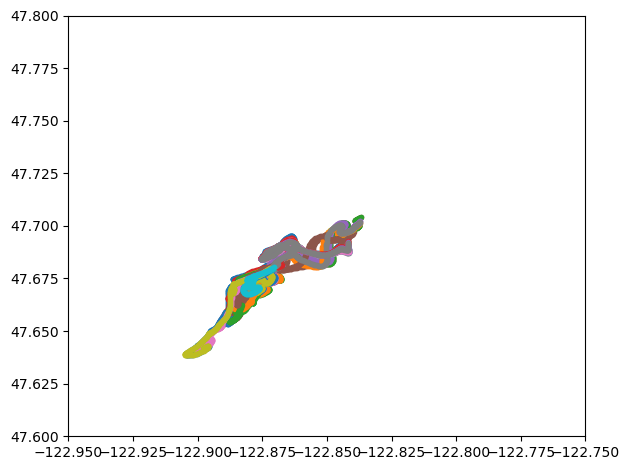

In [322]:
for i in range(50):
    plt.plot(test_out['lon'][i,:],test_out['lat'][i,:],'.')
    plt.ylim(47.6,47.8)
    plt.xlim(-122.95,-122.75)

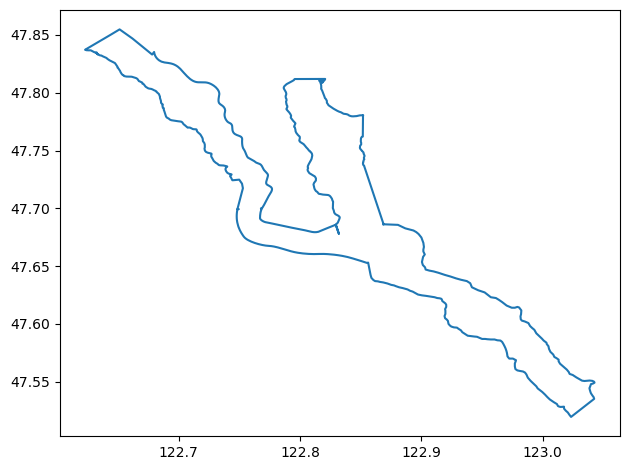

In [339]:
lat_permit = permit_boundary['Latitude']plt.plot(permit_boundary['Longitude'],permit_boundary['Latitude'])


In [340]:
permit_boundary['LongitudeW'] = -permit_boundary['Longitude']

In [349]:
import simplekml
kml = simplekml.Kml()
ls = kml.newlinestring(name='Permit Boundary')

line_coords = []
for index, row in permit_boundary.iterrows():
            
            try:
                lat = row['Latitude']
                lon = row['LongitudeW']
                #datetime_str = row['datetime'].strftime('%Y-%m-%dT%H:%MZ')
                # add to track arrays
                #track['when'].append(datetime_str)      # datetime string
                line_coords.append((lon,lat,0.0))   # lat, lon, z
                #track['angles'].append((0, 0.0, 0.0)) 
                #print(type(row['datetime']),row['datetime'])
            except Exception as e:
                logger.warning(f"trouble converting datetime in {name} feed: {e}")
            #print(datetime_str)
ls.coords =line_coords
kml.save('permit_line.kml')

In [341]:

def create_kml(df, 
               style={
                    'point icon': 'http://maps.google.com/mapfiles/kml/shapes/capital_small.png',
                    'lastpoint icon': 'http://maps.google.com/mapfiles/kml/shapes/capital_small.png',
                    'line color': '9911F0FF',
                    'line_weight': 3,
                    'icon scale': 0.6,
                    'icon color': '9911F0FF',
                    'highlight_bump' : 1.3,
                    'draw_points': False,
                    'draw_waypoints': False,
                    'draw_vectors': False,
                    'target_icon' : "https://sfmc.epsilonocean.com/sfmc/static/images/target-32x32.png",
                    'vehicle_icon' : f"https://dockserver.epsilonocean.com/~csarason/norse/assets/img/slocum_top.png"
                    }, 
                name="instrument",
                output_directory="/Users/cbps/code/epsilon-saweb/norse/assets",
                nested=False,
                parent_kml=[],
                fixed_bearing=False):
    # force dataframe to be increasing in time
    df = df.sort_values(['datetime'])
    # filter for reasonable lat/lons
    df = df.where((df.lon > -100) & (df.lon < 20) & (df.lat > 50) & (df.lat < 90))

    datetime_str = df['datetime'].iloc[-1].strftime('%Y-%m-%dT%H:%M:%SZ')

    if nested == False:
        # if this is not a nested KML, start a new KML file
        kml = simplekml.Kml()
        asset_fol = kml
        asset_fol.open = 1
    elif nested == True:
        # if this is a nested KML, add subfolders below the KML passed from the function call
        kml = parent_kml
        asset_fol = kml.newfolder(name=f'{name} lastfix: {datetime_str}')
        logger.info(f"In nested kml, name: {name}")
        asset_fol.open = 0
        if kml == []:
             print("ERROR: parent KML is empty")
    
    track= {'when': [],
            'coords': [],
            'angles': []}
    
    
    

    trk_fol = asset_fol.newfolder(name=f'Track, lastfix: {datetime_str}')
    # current loc with a big placemark no timestamp
    latf = df['lat'].iloc[-1]
    lonf = df['lon'].iloc[-1]

    cl = asset_fol.newpoint(name=f'{name}')
    cl.description = f"Most Recent {name} fix at: {latf:.7f},{lonf:.7f},{datetime_str}"
    cl.coords = [(lonf,latf)]
    cl.style.iconstyle.icon.href = style['lastpoint icon']
    #cl.style.iconstyle.scale = track_style_dict['slocum']['icon scale']
    cl.style.iconstyle.color = style['icon color']
    timenow = dt.datetime.now().strftime('%Y-%m-%dT%H%MZ')

    for index, row in df.iterrows():
            
            try:
                lat = row['lat']
                lon = row['lon']
                datetime_str = row['datetime'].strftime('%Y-%m-%dT%H:%MZ')
                # add to track arrays
                track['when'].append(datetime_str)      # datetime string
                track['coords'].append((lon,lat,0.0))   # lat, lon, z
                track['angles'].append((0, 0.0, 0.0)) 
                #print(type(row['datetime']),row['datetime'])
            except Exception as e:
                logger.warning(f"trouble converting datetime in {name} feed: {e}")
            #print(datetime_str)
            
    trk = trk_fol.newgxtrack(description=f'Track for {name}')
    # Add all the information to the track
    trk.newwhen(track['when']) # Each item in the give nlist will become a new <when> tag
    trk.newgxcoord(track['coords']) # Ditto
    if fixed_bearing == True:
        trk.newgxangle(track['angles'])
    #trk.description(f"Track for {name}")
    trk.stylemap.normalstyle.iconstyle.icon.href = style['vehicle_icon']
    trk.stylemap.normalstyle.linestyle.color = style['line color']
    trk.stylemap.normalstyle.iconstyle.scale = style['icon scale']
    #trk.stylemap.normalstyle.linestyle.color = 'yellow'
    trk.stylemap.normalstyle.linestyle.width = style['line_weight']
    trk.stylemap.highlightstyle.iconstyle.icon.href = style['vehicle_icon']
    trk.stylemap.highlightstyle.iconstyle.scale = style['icon scale']*style['highlight_bump']
    trk.stylemap.highlightstyle.linestyle.color = style['line color']
    trk.stylemap.highlightstyle.linestyle.width = style['line_weight']*style['highlight_bump']
    
    #kml.save(f"{output_directory}/{name}_LATEST.kml")
    #return kml; writing to file will require writing out after running this method

    return(kml)
